# Association Rule Mining with Apriori and FP-Growth  
**Name:** Jacob Jeffers  
**Course:** MSCS 634  
**Lab:** Lab 6 – Association Rule Mining and Pattern Discovery  


In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Online-Retail.xlsx", engine="openpyxl")

# Preview the data
print(df.columns)
print(df.head())


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [2]:
# Drop missing descriptions and invoice numbers
df = df.dropna(subset=["InvoiceNo", "Description"])

# Keep only positive quantity transactions
df = df[df["Quantity"] > 0]

# Remove leading/trailing whitespace from item names
df["Description"] = df["Description"].str.strip()

# Preview cleaned data
print(df.shape)
df.head()


(530693, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


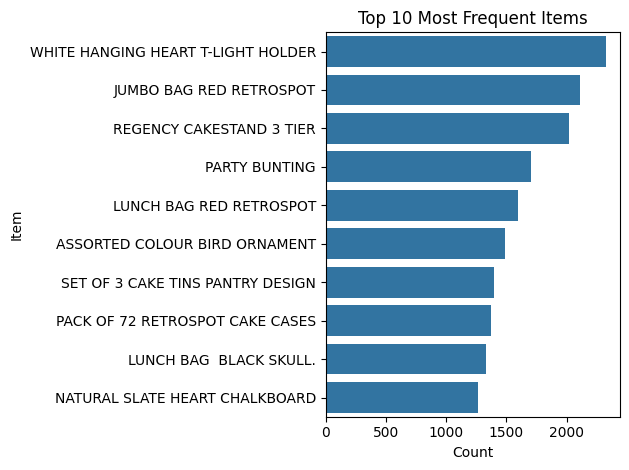

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 most frequent items
top_items = df["Description"].value_counts().head(10)
sns.barplot(x=top_items.values, y=top_items.index)
plt.title("Top 10 Most Frequent Items")
plt.xlabel("Count")
plt.ylabel("Item")
plt.tight_layout()
plt.show()


In [4]:
# Group transactions by InvoiceNo
transactions = df.groupby("InvoiceNo")["Description"].apply(list).tolist()

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

# Preview encoded data
df_encoded.head()


,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
from mlxtend.frequent_patterns import apriori

frequent_apriori = apriori(df_encoded, min_support=0.02, use_colnames=True)
frequent_apriori.sort_values("support", ascending=False, inplace=True)
frequent_apriori.head(10)


,support,itemsets
274,0.112237,(WHITE HANGING HEART T-LIGHT HOLDER)
102,0.103894,(JUMBO BAG RED RETROSPOT)
197,0.098778,(REGENCY CAKESTAND 3 TIER)
157,0.083731,(PARTY BUNTING)
127,0.077672,(LUNCH BAG RED RETROSPOT)
15,0.072259,(ASSORTED COLOUR BIRD ORNAMENT)
219,0.068782,(SET OF 3 CAKE TINS PANTRY DESIGN)
149,0.065554,(PACK OF 72 RETROSPOT CAKE CASES)
120,0.063220,(LUNCH BAG BLACK SKULL.)
139,0.062028,(NATURAL SLATE HEART CHALKBOARD)


C:\Users\jake.jeffers\AppData\Local\Temp\ipykernel_12928\2878094396.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


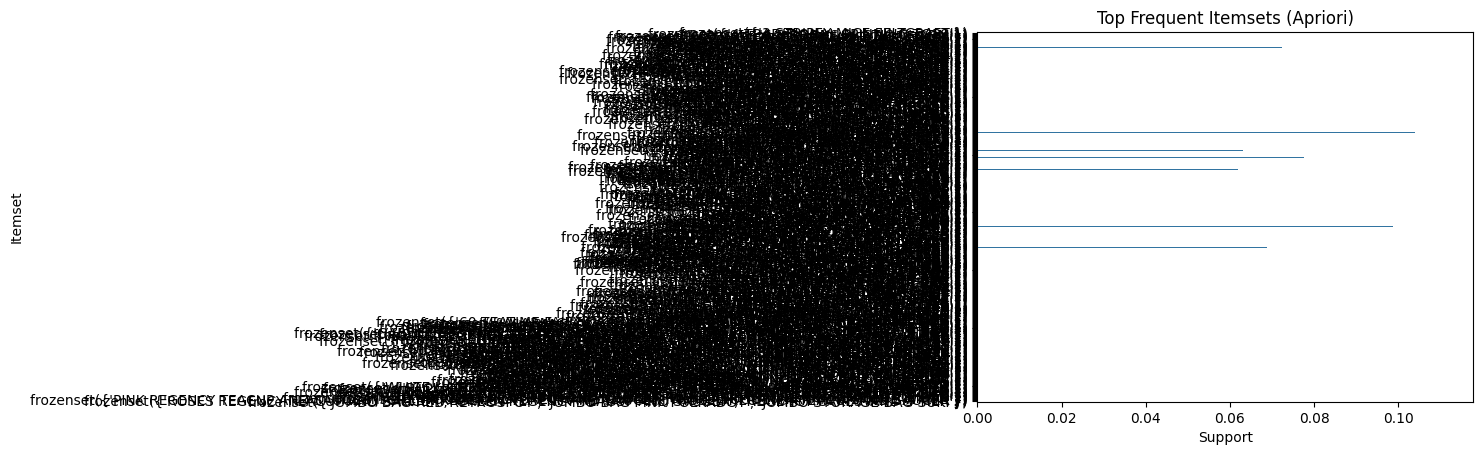

In [6]:
sns.barplot(x="support", y=frequent_apriori["itemsets"].astype(str), data=frequent_apriori.head(10))
plt.title("Top Frequent Itemsets (Apriori)")
plt.xlabel("Support")
plt.ylabel("Itemset")
plt.tight_layout()
plt.show()


In [7]:
from mlxtend.frequent_patterns import fpgrowth

frequent_fpgrowth = fpgrowth(df_encoded, min_support=0.02, use_colnames=True)
frequent_fpgrowth.sort_values("support", ascending=False).head(10)


,support,itemsets
0,0.112237,(WHITE HANGING HEART T-LIGHT HOLDER)
67,0.103894,(JUMBO BAG RED RETROSPOT)
163,0.098778,(REGENCY CAKESTAND 3 TIER)
233,0.083731,(PARTY BUNTING)
30,0.077672,(LUNCH BAG RED RETROSPOT)
4,0.072259,(ASSORTED COLOUR BIRD ORNAMENT)
244,0.068782,(SET OF 3 CAKE TINS PANTRY DESIGN)
31,0.065554,(PACK OF 72 RETROSPOT CAKE CASES)
108,0.063220,(LUNCH BAG BLACK SKULL.)
57,0.062028,(NATURAL SLATE HEART CHALKBOARD)


In [8]:
from mlxtend.frequent_patterns import association_rules

# Use Apriori itemsets
rules_apriori = association_rules(frequent_apriori, metric="confidence", min_threshold=0.4)
rules_apriori.head()

# Use FP-Growth itemsets
rules_fpgrowth = association_rules(frequent_fpgrowth, metric="confidence", min_threshold=0.4)
rules_fpgrowth.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(JAM MAKING SET PRINTED),(JAM MAKING SET WITH JARS),0.057708,0.056267,0.023441,0.406196,7.219035,1.0,0.020194,1.589300,0.914236,0.258914,0.370792,0.411395
1,(JAM MAKING SET WITH JARS),(JAM MAKING SET PRINTED),0.056267,0.057708,0.023441,0.416593,7.219035,1.0,0.020194,1.615155,0.912840,0.258914,0.380864,0.411395
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.048669,0.052195,0.031784,0.653061,12.511932,1.0,0.029244,2.731908,0.967146,0.460101,0.633956,0.631003
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.052195,0.048669,0.031784,0.608944,12.511932,1.0,0.029244,2.432722,0.970744,0.460101,0.588938,0.631003
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.052195,0.038886,0.023341,0.447193,11.500231,1.0,0.021312,1.738608,0.963326,0.344575,0.424827,0.523724


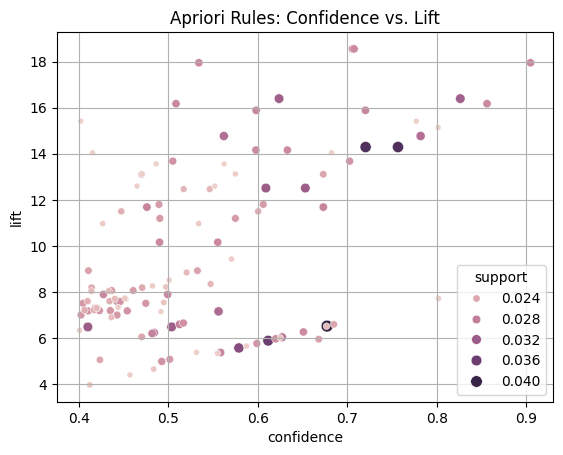

In [9]:
sns.scatterplot(data=rules_apriori, x="confidence", y="lift", hue="support", size="support")
plt.title("Apriori Rules: Confidence vs. Lift")
plt.grid(True)
plt.show()


## Summary and Observations

In this lab, I used the Online Retail dataset to explore association rule mining with both the Apriori and FP-Growth algorithms. After cleaning the data and encoding the transactions, I used both algorithms to find frequent itemsets and then generated association rules based on those results.

Apriori was more straightforward but noticeably slower, especially with larger support thresholds. FP-Growth ran much faster and gave similar outputs when using the same parameters. I visualized the top frequent itemsets and plotted confidence vs. lift to better understand the quality of the generated rules.

One of the most useful insights came from comparing the support and lift values. Rules with both high confidence and lift often revealed stronger item associations that could be valuable in a real-world recommendation setting.

This lab helped me get hands-on with two important algorithms and showed how meaningful patterns can be uncovered through association rule mining.
